# Analysis of Crime in the US Localities
# Problem and Clients
Public Safety is always an important sector and measurement of the local communities. For many, crime is a serious cause for concern and often impacts people's decision to live in certain areas. It's a frequent issue for communities, and many other issues can be affected by criminal activity in the area.

Crime can also act as an obstacle to the improvements made by community development. Most development plans need to consider the impact that crime-current and potential-can have on improvement efforts, and solutions to address those factors are often going to be a necessary inclusion. Ignoring community aspects related to crime isn't just going to be problematic later on, it's a sloppy way of planning that can make things unnecessarily difficult.

Thus, it is vital to analyze and predict the crime rate based on demographics and economic information about the particular locality. Also to find out which are the key factors that affect the crime rate. 

My client will be Bureau and police departments around the country. Using machine learning to help them better focus their resources on locations where crimes are more likely to be committed. Also, my client can be US online and print media that cover socio-economic and urban issues. These clients are magazines that take an active interest in stories driven by socially relevant issues and are backed by data analytics, for creating awareness within the public while simultaneously enhancing the quality of their readership.

# About the Data
The data was culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan. This data was put together by Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle University; Philadelphia, PA, 19141, USA on July 2009. The data come with the full dataset: crime in the US.csv and its explanation txt file: crime.names.txt


# Load the Data

In [22]:
import pandas as pd 
import numpy as np
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import math
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from subprocess import check_output
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('communities-crime-full.csv')

In [3]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [4]:
df.shape

(1994, 128)

# Data Wrangling and Exploration Analysis
## Missing Values
From the data preview, we can see there are several columns with lots of question marks. 
I converted the question marks to NaNs and checked the number of NaNs for each column first. Drop the two columns:county and community as they have numbers which do not have any meaning and we already have the communityname column. There are some columns with more than 1600 missing values while we have total 1994 rows. I would also drop those columns. There are 104 columns after removing those columns with missing values. 
Then I would check again to see if there is any missing values. And I found the column: OtherPerCap, which is per capita income for people with 'other' heritage. I would fill the NaNs in this column using the mean of the this column group by state where the missing value is. 
The target variable is ViolentCrimesPerPop: total number of violent crimes per 100K popuation

In [5]:
df=df.replace('?', np.NaN)

In [6]:
print(df.isnull().sum())

state                      0
county                  1174
community               1177
communityname              0
fold                       0
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT  

In [7]:
df=df.dropna(thresh=len(df)-1000,axis=1, how='any')
df.shape

(1994, 104)

In [8]:
df.isnull().values.any()

True

In [9]:
df.columns[df.isnull().any()].tolist()

['OtherPerCap']

In [10]:
print(type(df.OtherPerCap))

<class 'pandas.core.series.Series'>


In [11]:
df['OtherPerCap']=pd.to_numeric(df.OtherPerCap)

In [12]:
# Create a groupby object
group = df.groupby('state')
# Write a function that imputes mean
def impute_mean(series):
    return series.fillna(series.mean())

df.OtherPerCap = group.OtherPerCap.transform(impute_mean)


In [13]:
df.isnull().values.any()

False

In [14]:
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [15]:
df.sort_values(['state', 'communityname']).reset_index(drop=True).head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


## Histogram
Plot a histogram to see the distribution of the violent crime rate per 100k population, we can see that most rates are between 0 to 0.2. I will then group the crime rate by state and get the average crime rate for each state and view the top 10 states in descending order to see which states have higher crime rate per capita. 

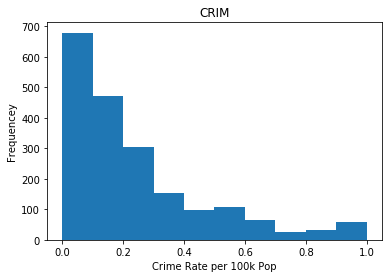

In [16]:
plt.hist(df.ViolentCrimesPerPop)
plt.title("CRIM")
plt.xlabel("Crime Rate per 100k Pop")
plt.ylabel("Frequencey")
plt.show()

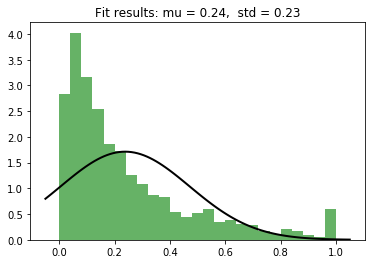

In [96]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data:
mu, std = norm.fit(df.ViolentCrimesPerPop)

# Plot the histogram.
plt.hist(df.ViolentCrimesPerPop, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [102]:
print(avg_crime.median())

0.21466060606060605


In [53]:
print(df.ViolentCrimesPerPop.mode())

0    0.03
dtype: float64


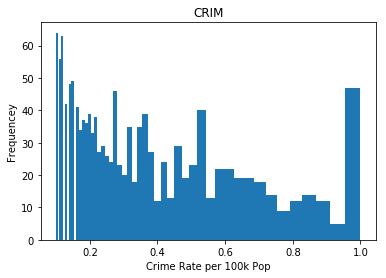

In [103]:
plt.hist(df.ViolentCrimesPerPop, bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))
plt.title("CRIM")
plt.xlabel("Crime Rate per 100k Pop")
plt.ylabel("Frequencey")
plt.show()

In [17]:
#Get the average crime rate by state and view top10 in descending order
by_state = df.groupby('state')
avg_crime = by_state['ViolentCrimesPerPop'].mean()
print(avg_crime.sort_values(ascending=False).head(10))

state
11    1.000000
22    0.504545
45    0.486786
24    0.480000
12    0.458333
37    0.401957
1     0.393721
13    0.384054
10    0.370000
20    0.360000
Name: ViolentCrimesPerPop, dtype: float64


In [14]:
print(avg_crime.median())

0.21466060606060605


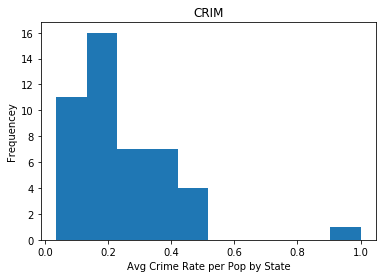

In [15]:
plt.hist(avg_crime)
plt.title("CRIM")
plt.xlabel("Avg Crime Rate per Pop by State")
plt.ylabel("Frequencey")
plt.show()

In [39]:
pd.merge(avg_crime, df, on=['state'], how='left').sort_values('ViolentCrimesPerPop_x',ascending=False).head()

,state,ViolentCrimesPerPop_x,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop_y
464,11,1.000000,Washingtoncity,6,0.96,0.32,1.00,0.00,0.11,0.10,...,0.29,0.36,0.57,0.61,0.33,0.18,0.83,1.00,0.45,1.00
715,22,0.504545,BossierCitycity,10,0.07,0.50,0.35,0.69,0.09,0.05,...,0.07,0.49,0.43,0.42,0.44,0.11,0.12,0.02,0.52,0.44
713,22,0.504545,Natchitochescity,9,0.01,0.68,0.97,0.21,0.04,0.02,...,0.02,0.87,0.49,0.60,0.80,0.03,0.14,0.00,0.00,0.33
712,22,0.504545,Kennercity,8,0.10,0.55,0.35,0.66,0.10,0.18,...,0.23,0.74,0.58,0.71,0.76,0.04,0.40,0.12,0.53,0.50
711,22,0.504545,Shreveportcity,8,0.30,0.42,0.87,0.30,0.03,0.02,...,0.03,0.77,0.62,0.81,0.78,0.29,0.17,0.19,1.00,0.53


Plot a histogram for the average crime rate by state, we can see most rates are between 0.1 to 0.2. Only two states are above 0.5. By merging with tht original dataset, we can see the top 2 states are washington dc and Louisiana. 

## Correlations and Scatterplots
Since this dataset has 104 columns, the pair correlations cannot be visualized. I want to see the top 10 fields that have the highest correlations to the target variables. 

In [70]:
S=df.drop(['ViolentCrimesPerPop','communityname'], axis=1).apply(lambda x: x.corr(df.ViolentCrimesPerPop))

In [75]:
S[S.abs().sort_values(ascending=False).head(10).index]

PctKids2Par        -0.738424
PctIlleg            0.737957
PctFam2Par         -0.706667
racePctWhite       -0.684770
PctYoungKids2Par   -0.666059
PctTeen2Par        -0.661582
racepctblack        0.631264
pctWInvInc         -0.576324
pctWPubAsst         0.574665
FemalePctDiv        0.556032
dtype: float64

From the top 10 variables that have the highest correlations with the target variables are mainly involving single parents or two parents, race, kids, age, income, public assistance, and gender. Then I would plot some scatterplots to visulaize those relationships. 

Text(0.5, 1.0, 'Relationship between PctKids2Par and Crime')

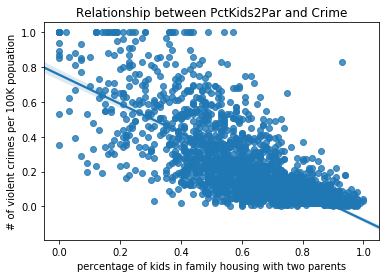

In [78]:
sns.regplot(y="ViolentCrimesPerPop", x="PctKids2Par", data=df, fit_reg = True)
plt.xlabel("percentage of kids in family housing with two parents")
plt.ylabel("# of violent crimes per 100K popuation")
plt.title("Relationship between PctKids2Par and Crime")

Text(0.5, 1.0, 'Relationship between PctIlleg and Crime')

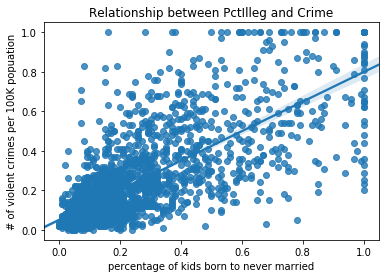

In [81]:
sns.regplot(y="ViolentCrimesPerPop", x="PctIlleg", data=df, fit_reg = True)
plt.xlabel("percentage of kids born to never married")
plt.ylabel("# of violent crimes per 100K popuation")
plt.title("Relationship between PctIlleg and Crime")

# Regression Model and Selection
I would like to develop some regression models and selection the best one to predict the violent crime rate per 100k population. Since the data has about 100 features, I will use Lasso, Ridge regression and elastic net regression. Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties

In [35]:
## Lasso
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).values
y = df['ViolentCrimesPerPop'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [42]:
lasso = Lasso()
alphas=(10,1, 0.1, 0.01, 0.001)

tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(lasso, tuned_parameters, cv=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Lasso Tuned alpha: {}".format(clf.best_params_)) 
print("Lasso R-Squared: {}".format(clf.score(X_test, y_test)))
print("Lasso training MSE: {}".format(mean_squared_error(y_train,clf.predict(X_train)))) 
print("Lasso test MSE: {}".format(mean_squared_error(y_test,y_pred))) 

Lasso Tuned alpha: {'alpha': 0.001}
Lasso R-Squared: 0.645254861011625
Lasso training MSE: 0.019063494299923905
Lasso test MSE: 0.016985112938762453


We notice that the Lasso regression model explains 64.5% of the variance in the model. Not overfitting as the MSE for both training and testing are similar

In [47]:
# Compute and print the coefficients
df_columns=df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).columns
lasso=Lasso(alpha=0.001)
lasso_coef = lasso.fit(X_train,y_train).coef_
coef = pd.Series(lasso_coef, index = df_columns)
print(coef[coef.abs().sort_values(ascending=False).head(10).index])

PctIlleg            0.199039
PctKids2Par        -0.161789
MalePctDivorce      0.152250
racepctblack        0.148846
NumStreet           0.144383
PctYoungKids2Par   -0.077533
HousVacant          0.076542
PctPersDenseHous    0.069958
PctHousOccup       -0.062515
racePctWhite       -0.059853
dtype: float64


In [48]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 79 variables


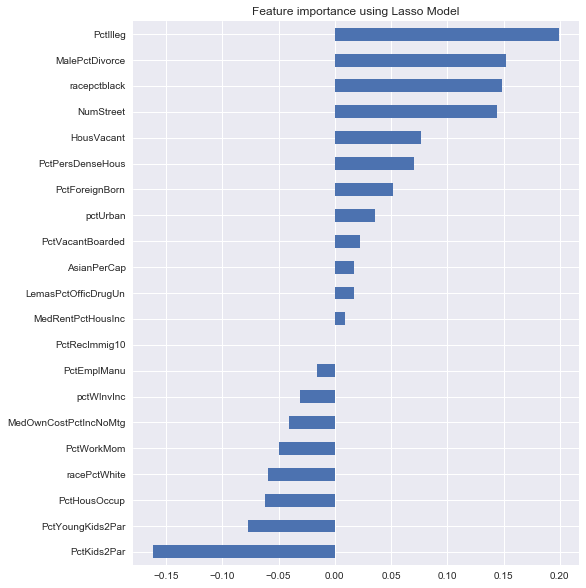

In [51]:
imp_coef = coef[coef!=0].sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

In [39]:
## Ridge Regression
ridge = Ridge()
alphas=(10,1, 0.1, 0.01, 0.001,100)

tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(ridge, tuned_parameters, cv=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("ridge Tuned alpha: {}".format(clf.best_params_)) 
print("ridge R-Squared: {}".format(clf.score(X_test, y_test)))
print("ridge training MSE: {}".format(mean_squared_error(y_train,clf.predict(X_train)))) 
print("ridge test MSE: {}".format(mean_squared_error(y_test,y_pred))) 

ridge Tuned alpha: {'alpha': 1.0}
ridge R-Squared: 0.633979696797609
ridge training MSE: 0.0171756282734736
ridge test MSE: 0.017524965121442904


In [45]:
## Elastic net
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/apple/ana

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.41990183317661167
Tuned ElasticNet MSE: 0.027774962349483238


/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Classification Model and Selection
## Find the optimal cut-off point
I would like to find a optimal cutoff point of the crime rate and use this point to classify the rate into a binary variable: high crime and low crime. The optimal cut off point would be where true positive rate is high and the false positive rate is low. 

In [18]:
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).values
y = df['ViolentCrimesPerPop'].values
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


In [20]:
pca = PCA()
pcafit = pca.fit_transform(X,y)
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))

0     0.267681
1     0.187885
2     0.082399
3     0.070963
4     0.046097
5     0.039662
6     0.032511
7     0.027600
8     0.020510
9     0.019057
10    0.014152
11    0.013733
12    0.012996
13    0.011851
14    0.010492
15    0.008844
16    0.008238
17    0.007403
18    0.006914
19    0.006492
20    0.006231
21    0.006006
22    0.005889
23    0.005526
24    0.004943
25    0.004354
26    0.004080
27    0.003934
28    0.003682
29    0.003563
        ...   
70    0.000330
71    0.000312
72    0.000294
73    0.000269
74    0.000261
75    0.000225
76    0.000209
77    0.000198
78    0.000191
79    0.000178
80    0.000168
81    0.000158
82    0.000149
83    0.000124
84    0.000111
85    0.000095
86    0.000084
87    0.000065
88    0.000063
89    0.000054
90    0.000042
91    0.000038
92    0.000037
93    0.000035
94    0.000019
95    0.000017
96    0.000015
97    0.000007
98    0.000007
99    0.000005
Length: 100, dtype: float64


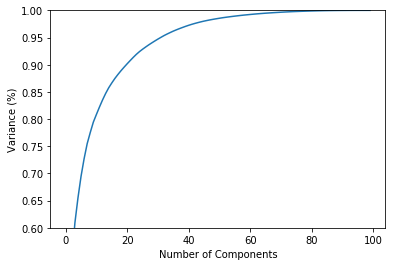

In [32]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.ylim([0.6, 1])
plt.plot(np.cumsum(var_explained))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [41]:
print(sum(var_explained[0:60]))

0.9918648409443792


### Find the number of components should keep using PCA
This plot tells us that selecting 60 components we can preserve something around 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.
With this information in our hands, we can implement the PCA for 60 best components

In [104]:
# Create the hyperparameter grid
param_range_fl = [1.0, 0.5, 0.1]
param_grid = [{'clf__penalty': ['l1', 'l2'],
'clf__C': param_range_fl}]  

LogisticRegression(solver='lbfgs')
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y, test_size=0.3,random_state=5)

lab_enc = preprocessing.LabelBinarizer()
training_scores_encoded = lab_enc.fit_transform(ylr.astype(int))

# create pipeline from pca to logregression space
pipe_lr_pca = Pipeline([('pca', PCA(n_components=60)),
('clf', LogisticRegression(class_weight='balanced'))])


In [105]:
# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(pipe_lr_pca, param_grid, cv=5)
# Fit the model on the trainng data.
logreg_cv.fit(Xlr, training_scores_encoded)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))

C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver 

Tuned Logistic Regression Parameter: {'clf__C': 1.0, 'clf__penalty': 'l1'}


C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver 

In [106]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg_cv.predict_proba(Xtestlr)[:,1]
lab_enc = preprocessing.LabelBinarizer()
testing_scores_encoded = lab_enc.fit_transform(ytestlr.astype(int))

In [112]:
print(testing_scores_encoded)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [107]:
threshold = Find_Optimal_Cutoff(testing_scores_encoded, y_pred_prob)
print (threshold)

[0.13097645422774193]


C:\Users\ckuang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [16]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['ViolentCrimesPerPop'] > 0.13097645422774193:
        return True
    else:
        return False
    
# Adding a new field "highCrime"
df['highCrime'] = df.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = df.groupby('highCrime').size() * 100 / len(df)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

highCrime
False    45.336008
True     54.663992
dtype: float64
------------------
Percentage Positive Instance = 54.663991975927786
Percentage Negative Instance = 45.336008024072214 


## Create a new binary target variable
Now, I have created a new target variable using the optimal cut-off point from the logistic regression and ROC curve. The new target variable is highcrime. If the ViolentCrimesPerPop is greater than 0.13097645422774193, then will be true. Otherwise will be false. We can see the two classes are pretty balanced with 55 to 45. I will use this binary target variable to fit all classification models next. Let's preview the dataset before building the models:

In [17]:
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20,True
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67,True
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43,True
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12,False
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03,False


## Fit PCA
Now we can see the new highCrime target variable in the dataset. I will create new X and y and fit a PCA again using this new target variable to find out the number of components should keep for the classifications models.

In [18]:
X = df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1).values
y = df['highCrime'].values

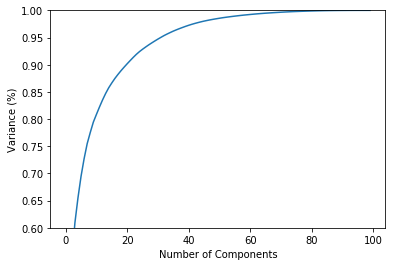

In [19]:
pca = PCA()
pcafit = pca.fit_transform(X,y)
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.ylim([0.6, 1])
plt.plot(np.cumsum(var_explained))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [20]:
print(sum(var_explained[0:60]))

0.9918648409443792


This plot tells us that selecting 60 components we can preserve something around 99% of the total variance of the data. This is pretty much the same as we did before using the ViolentCrimesPerPop variable as the target variable, we can implement the PCA for 60 best components next

In [ ]:
# Create the hyperparameter grid
param_range_fl = [1.0, 0.5, 0.1]
param_grid = [{'clf__penalty': ['l1', 'l2'],
'clf__C': param_range_fl}]  

LogisticRegression(solver='lbfgs')
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=5)

# create pipeline from pca to logregression space
pipe_lr_pca = Pipeline([('pca', PCA(n_components=60)),
('clf', LogisticRegression(class_weight='balanced'))])
